# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.17 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [5]:
print(state_size)

33


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.7399999834597111


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
%load_ext autoreload
%autoreload 2

from ddpg_agent import Agent
from collections import deque
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [8]:
#The agent network
#Agent(state_size, action_size, random_seed=0)

cuda:0
instantiated 1 agents
Episode 20	Average Score: 0.62	Score: 0.37 time used 7.57 
Episode 40	Average Score: 1.26	Score: 2.92 time used 7.64 
Episode 60	Average Score: 2.43	Score: 2.39 time used 7.47 
Episode 80	Average Score: 3.60	Score: 9.43 time used 7.45 
Episode 100	Average Score: 5.09	Score: 14.08 time used 7.67 
Episode 100	Average Score: 5.09
Time used 760.8634357452393 as at episode 100
Episode 120	Average Score: 7.60	Score: 17.32 time used 7.60 
Episode 140	Average Score: 11.08	Score: 19.18 time used 7.71 
Episode 160	Average Score: 14.42	Score: 21.95 time used 7.65 
Episode 180	Average Score: 18.04	Score: 28.69 time used 7.76 
Episode 200	Average Score: 21.95	Score: 33.78 time used 7.83 
Episode 200	Average Score: 21.95
Time used 1532.6327106952667 as at episode 200
Episode 220	Average Score: 25.74	Score: 31.98 time used 7.55 
Episode 240	Average Score: 27.95	Score: 34.88 time used 7.65 
Episode 260	Average Score: 29.42	Score: 16.89 time used 7.74 

Environment solved i

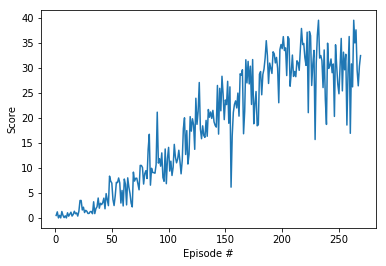

In [9]:
def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_ep  = []
    start=time.time()
    max_score = -np.Inf
    
    agents = [] 
    
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    print('instantiated {} agents'.format(num_agents))   
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations            # get the current state
        for agent in agents:
            agent.reset()
            
        scores =np.zeros(num_agents)
        score = 0
        timestep = time.time()
        #print('start episode {} timestep iteration'.format(i_episode))
        for t in range(max_t):
            #print(state)
            action = np.array([agents[i].act(state[i]) for i in range(num_agents)])
            #print(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations   # get the next state
            reward = env_info.rewards                   # get the reward
            done = env_info.local_done                  # see if episode has finished
            #next_state, reward, done, _ = env.step(action)
            for i in range(num_agents):
                #print("agent ",i," take step")
                agents[i].step(state[i], action[i], reward[i], next_state[i], done[i])
                
            state = next_state
            scores += reward
            if np.any(done):
                break 
        score = np.mean(scores)
        scores_deque.append(score)
        scores_ep.append(score)
        if i_episode % 20 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f} time used {:.2f} '.format(i_episode, np.mean(scores_deque), score, time.time() - timestep))
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            end = time.time()
            print("Time used {} as at episode {}".format(end-start,i_episode))
        if np.mean(scores_deque)>30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
        if i_episode >2000:
            break
            
    end = time.time()
    print("Time used {}".format(end-start))
    return scores_ep

scores_ep = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_ep)+1), scores_ep)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### see agent perform after it is trained

In [13]:
agent = Agent(state_size, action_size, random_seed=0)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

trained_scores = deque(maxlen=100)
for i_episode in range(101):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    t_step = 0
    while True:
        actions = agent.act(states[0])
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        t_step+=1
        if np.any(dones) or t_step>=2000:                                  # exit loop if episode finished
            break
    score = np.mean(scores)
    trained_scores.append(score)
    if i_episode % 10 == 0:
        print('Total score this episode {} : {}'.format(i_episode,score))

cuda:0
Total score this episode 0 : 35.569999204948545
Total score this episode 10 : 33.85999924317002
Total score this episode 20 : 37.74999915622175
Total score this episode 30 : 26.439999409019947
Total score this episode 40 : 34.27999923378229
Total score this episode 50 : 38.75999913364649
Total score this episode 60 : 32.01999928429723
Total score this episode 70 : 33.80999924428761
Total score this episode 80 : 27.049999395385385
Total score this episode 90 : 26.789999401196837
Total score this episode 100 : 25.90999942086637


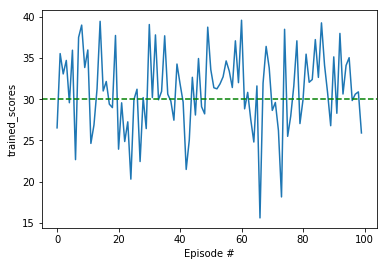

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trained_scores)), trained_scores)
plt.axhline(y=30, color='g', linestyle='--')
plt.ylabel('trained_scores')
plt.xlabel('Episode #')
plt.show()